In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, probplot
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [2]:
housing = pd.read_csv("clean_housing.csv")

In [3]:
clean_data = pd.read_csv("housing_new.csv")
train =clean_data.iloc[:,1:]
train

SalePrice        PID  GrLivArea  MSSubClass  MSZoning  LotFrontage  \
0        126000  909176150        856          30         0         60.0   
1        139500  905476230       1049         120         0         42.0   
2        124900  911128020       1001          30         0         60.0   
3        114000  535377150       1039          70         0         80.0   
4        227000  534177230       1665          60         0         70.0   
...         ...        ...        ...         ...       ...          ...   
6789     196500  908128100       1724          60         0         62.0   
6790     139600  905402060       1733          20         0         60.0   
6791     145000  909275030       2002          90         0         82.0   
6792     217500  907192040       1842          60         0         60.0   
6793     215000  906223180       1911          60         0         80.0   

      LotArea  Street  Alley  LotShape  ...  Electrical__FuseP  \
0        7890       1   -0.1         0  ...                  0   
1        4235       1   -0.1         0  ...                  0   
2        6060       1   -0.1         0  ...                  0   
3        8146       1   -0.1         0  ...                  0   
4        8400       1   -0.1         0  ...                  0   
...       ...     ...    ...       ...  ...                ...   
6789     7162       1   -0.1         0  ...                  0   
6790    13680       1   -0.1         1  ...                  0   
6791     6270       1   -0.1         0  ...                  0   
6792     8826       1   -0.1         0  ...                  0   
6793     9554       1   -0.1         1  ...                  0   

      Electrical__None  Electrical__SBrkr  GarageFinish__No Garage  \
0                    0                  1                        0   
1                    0                  1                        0   
2                    0                  1                        0   
3                    0                  1                        0   
4                    0                  1                        0   
...                ...                ...                      ...   
6789                 0                  1                        0   
6790                 0                  0                        0   
6791                 0                  0                        0   
6792                 0                  1                        0   
6793                 0                  1                        0   

      GarageFinish__RFn  GarageFinish__Unf  Fence__GdWo  Fence__MnPrv  \
0                     0                  1            0             0   
1                     0                  0            0             0   
2                     0                  1            0             0   
3                     0                  1            0             0   
4                     0                  0            0             0   
...                 ...                ...          ...           ...   
6789                  0                  0            0             0   
6790                  0                  1            0             0   
6791                  0                  1            0             0   
6792                  0                  0            0             0   
6793                  1                  0            0             0   

      Fence__MnWw  Fence__No Fence  
0               0                1  
1               0                1  
2               0                1  
3               0                1  
4               0                1  
...           ...              ...  
6789            0                1  
6790            0                1  
6791            0                1  
6792            0                1  
6793            0                1  

[6794 rows x 134 columns]

In [4]:

Y = train['SalePrice']/train['TotalSF']

In [5]:
pmin = min(Y)
print(pmin)

pmax = max(Y)
print(pmax)

print(train.shape)
print(Y.shape)

train.columns


23.353573096683792
138.12544045102186
(6794, 134)
(6794,)


Index(['SalePrice', 'PID', 'GrLivArea', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       ...
       'Electrical__FuseP', 'Electrical__None', 'Electrical__SBrkr',
       'GarageFinish__No Garage', 'GarageFinish__RFn', 'GarageFinish__Unf',
       'Fence__GdWo', 'Fence__MnPrv', 'Fence__MnWw', 'Fence__No Fence'],
      dtype='object', length=134)

In [6]:
train['target'] = train['SalePrice']/train['TotalSF']
import folium
import branca.colormap as cm

#colormap = cm.LinearColormap(colors=['blue','red'], index=[40000,500000],vmin=40000,vmax=625000)

colormap = cm.StepColormap(
    colors=['#00ae53', '#86dc76', '#daf8aa',
            '#ffe6a4', '#ff9a61', '#ee0028'],
    vmin=min(Y),
    vmax=max(Y),
    index=[20, 40,])



map1 = folium.Map(
    location=[42.018,-93.6465],
    tiles='cartodbpositron',
    zoom_start=12.4,
)
train.apply(lambda row:folium.Circle(location=[row["lat"], row["long"]], radius=((row['income'])**2/1e8), fill=True, color=colormap(row['target'])).add_to(map1), axis=1)


map1.save('map.html')
map1


# map for houses, radius = income and color = price/SF

Since houses are priced by their size, it makes sense that the SALE PRICE and the total SF are strongly correlated. 

Coefficient of determination: 0.68


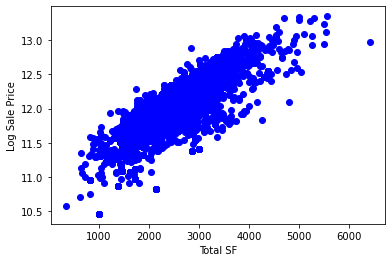

In [7]:
# Ground Living Area and Total Sf.
# plt.scatter(train['SalePrice'],train['TotalSF'])
# plt.ylabel('Total size [sf]')
# plt.xlabel('Sales Price')


# # creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
lm.fit(train[['SalePrice']],train['TotalSF'])
Y_P =  lm.predict(train[['SalePrice']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['TotalSF'], Y_P))

# ## Plot outputs
plt.scatter(train[['TotalSF']], np.log(train['SalePrice']+1),  color='blue')
#plt.plot(train[['SalePrice']], Y_P, color='blue', linewidth=3)

plt.xlabel('Total SF')
plt.ylabel('Log Sale Price')


plt.savefig('./Figures/price_size_scatter.png', bbox_inches = 'tight', dpi=350)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


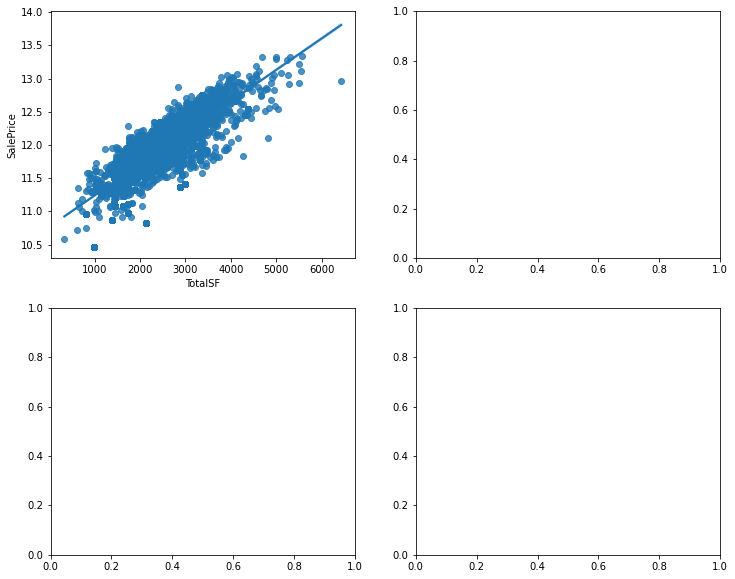

In [8]:

fig, axes = plt.subplots(ncols=2, nrows= 2,figsize=(12,10))


ax_curr = axes[0, 0]
sns.regplot(train[['TotalSF']], np.log(train['SalePrice']+1), ax = ax_curr)
plt.show()

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


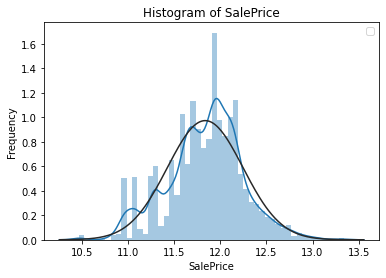

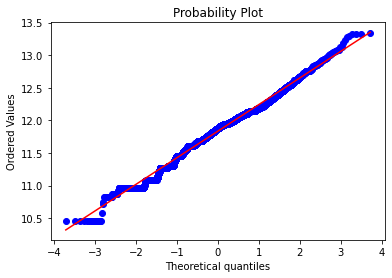

In [9]:
mu, sigma = norm.fit(train['SalePrice'])
plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')

sns.distplot(np.log(train['SalePrice']+1), fit=norm)
#plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice');
plt.savefig('./Figures/SalePrice_distrib.png', bbox_inches = 'tight', dpi=350)


fig = plt.figure()
res = probplot(np.log(train['SalePrice']+1), plot=plt);
plt.savefig('./Figures/SalePrice_prod.png', bbox_inches = 'tight', dpi=350)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


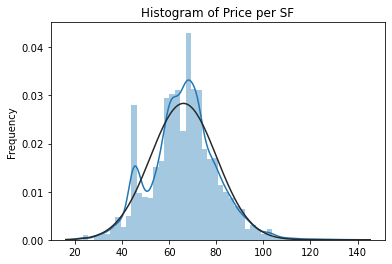

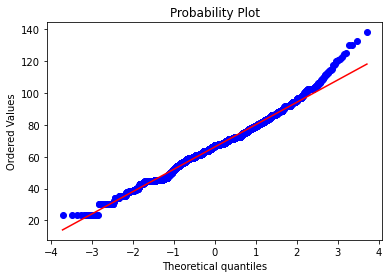

In [10]:
mu, sigma = norm.fit(Y)
sns.distplot(Y, fit=norm)
#plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of Price per SF');
plt.savefig('./Figures/price_SF_distrib.png', bbox_inches = 'tight', dpi=350)


fig = plt.figure()
res = probplot(Y, plot=plt);
plt.savefig('./Figures/price_SF_prod.png', bbox_inches = 'tight', dpi=350)

Explore some relationships

In [11]:
train['PricePerSF'] = train['SalePrice']/train['TotalSF']

In [12]:
X1=train
X1.columns

Index(['SalePrice', 'PID', 'GrLivArea', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       ...
       'Electrical__SBrkr', 'GarageFinish__No Garage', 'GarageFinish__RFn',
       'GarageFinish__Unf', 'Fence__GdWo', 'Fence__MnPrv', 'Fence__MnWw',
       'Fence__No Fence', 'target', 'PricePerSF'],
      dtype='object', length=136)

### Features that were created for analysis
- distance to university was found with geopy
- income per census tract was added (does not necessary line up with the neighborhood.)
- NA in LotFrontage were filled with median 
- NA in income were filled with median
- Finished Basement area was calculated using Total Bsmt SF - Basement unfinished SF
- Total SF (part of target) was calculated using Total BsmtSF + first FL SF + second FL SF
- bsmt above ground ration is calculated by dividing the total Bsmt SF by the first + second flr SF
- Basement ration is calculated by finished/totalBsmt SF
- Bedr ratio is calculated by Bedroom above Grd/ total rms (--> larger number means more bdr than other rms)
- 

Coefficient of determination: 0.03


Text(0, 0.5, 'dist')

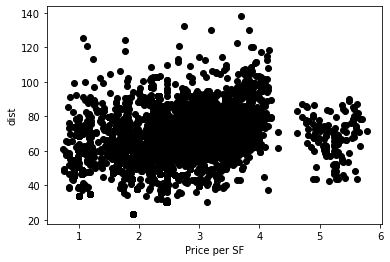

In [13]:
# Income
lm = LinearRegression()
# fitting the training data
lm.fit(train[['dist']],train['PricePerSF'])
Y_P =  lm.predict(train[['dist']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(train['PricePerSF'], Y_P))

# ## Plot outputs
plt.scatter(train[['dist']], train['PricePerSF'],  color='black')
#plt.plot(train[['dist']], Y_P, color='blue', linewidth=3)

plt.xlabel('Price per SF')
plt.ylabel('dist')


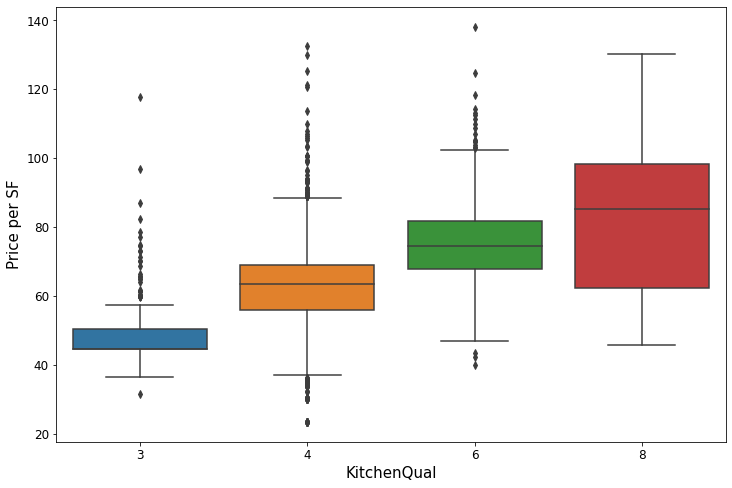

In [14]:
grouped = train[['PricePerSF', 'KitchenQual']].groupby(['KitchenQual']).median().sort_values(by='KitchenQual')

plt.figure(figsize=(12,8))
b = sns.boxplot(x=train.KitchenQual, y=train.PricePerSF, order=grouped.index)

b.set_xlabel("KitchenQual",fontsize = 15)
b.set_ylabel("Price per SF",fontsize = 15)
b.tick_params(labelsize = 12)
plt.savefig('./Figures/Kitchen_Qual', bbox_inches = 'tight', dpi=350)

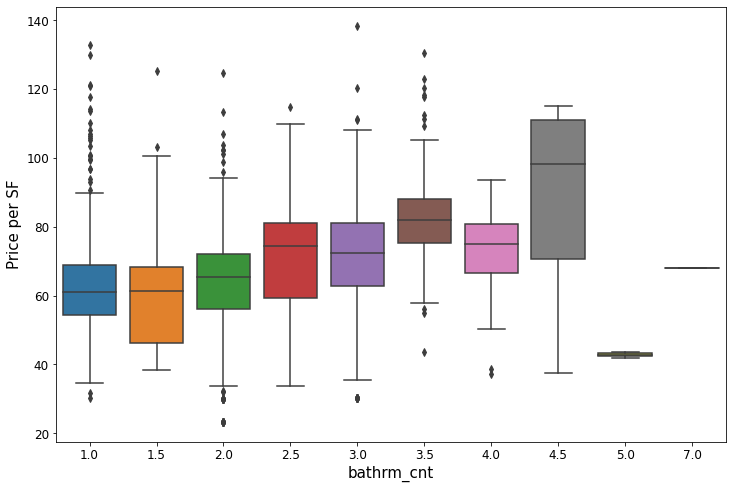

In [15]:
grouped = train[['PricePerSF', 'bathrm_cnt']].groupby(['bathrm_cnt']).median().sort_values(by='bathrm_cnt')

plt.figure(figsize=(12,8))
b = sns.boxplot(x=train.bathrm_cnt, y=train.PricePerSF, order=grouped.index)

b.set_xlabel("bathrm_cnt",fontsize = 15)
b.set_ylabel("Price per SF",fontsize = 15)
b.tick_params(labelsize = 12)
plt.savefig('./Figures/bathrm_cnt', bbox_inches = 'tight', dpi=350)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


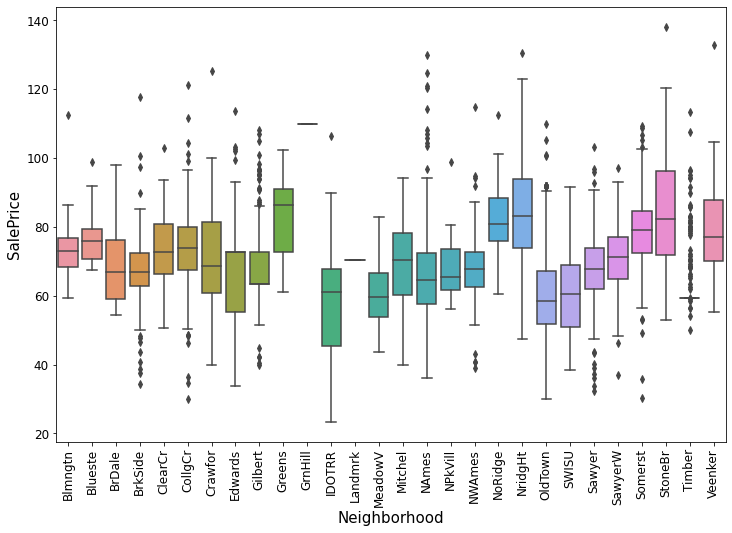

In [16]:
grouped = housing[[ 'Neighborhood', 'SalePrice']].groupby(['Neighborhood']).median().sort_values(by='Neighborhood')

plt.figure(figsize=(12,8))
b = sns.boxplot(housing.Neighborhood, y=train.PricePerSF, order=grouped.index)
plt.xticks(rotation = 90)
b.set_xlabel("Neighborhood",fontsize = 15)
b.set_ylabel("SalePrice",fontsize = 15)
b.tick_params(labelsize = 12)
plt.savefig('./Figures/Neighborhood', bbox_inches = 'tight', dpi=350)

In [17]:
housing[housing['TotalSF'] > 2860].shape

(1296, 95)

In [18]:
# grouped = train[['PricePerSF', 'BedroomAbvGr']].groupby(['BedroomAbvGr']).median().sort_values(by='BedroomAbvGr')

# sns.boxplot(x=train.BedroomAbvGr, y=train.PricePerSF, order=grouped.index)

In [19]:
X1.columns

Index(['SalePrice', 'PID', 'GrLivArea', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       ...
       'Electrical__SBrkr', 'GarageFinish__No Garage', 'GarageFinish__RFn',
       'GarageFinish__Unf', 'Fence__GdWo', 'Fence__MnPrv', 'Fence__MnWw',
       'Fence__No Fence', 'target', 'PricePerSF'],
      dtype='object', length=136)

In [20]:
# grouped = train[['PricePerSF', 'TotRmsAbvGrd']].groupby(['TotRmsAbvGrd']).median().sort_values(by='TotRmsAbvGrd')

# sns.boxplot(x=train.TotRmsAbvGrd, y=train.PricePerSF, order=grouped.index)

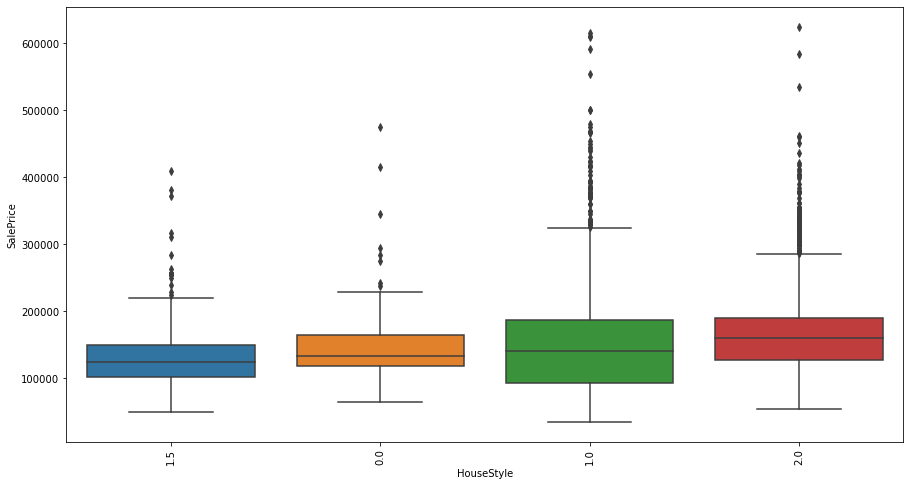

In [21]:
grouped = housing[['SalePrice', 'HouseStyle']].groupby(['HouseStyle']).median().sort_values(by='SalePrice')

plt.figure(figsize=(15,8))
sns.boxplot(x=housing.HouseStyle, y=housing.SalePrice, order=grouped.index)
plt.xticks(rotation = 90)
plt.savefig('./Figures/House_style', bbox_inches = 'tight', dpi=350)

In [22]:
train.columns

Index(['SalePrice', 'PID', 'GrLivArea', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       ...
       'Electrical__SBrkr', 'GarageFinish__No Garage', 'GarageFinish__RFn',
       'GarageFinish__Unf', 'Fence__GdWo', 'Fence__MnPrv', 'Fence__MnWw',
       'Fence__No Fence', 'target', 'PricePerSF'],
      dtype='object', length=136)

Coefficient of determination: 0.51


Text(0, 0.5, 'SalePrice')

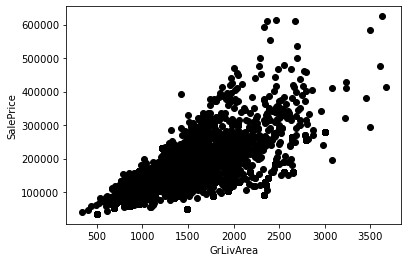

In [23]:
# # creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
lm.fit(housing[['GrLivArea']],housing['SalePrice'])
Y_P =  lm.predict(housing[['GrLivArea']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(housing['SalePrice'], Y_P))

# ## Plot outputs
plt.scatter(housing[['GrLivArea']], housing['SalePrice'],  color='black')
#plt.plot(housing[['PricePerSF']], Y_P, color='blue', linewidth=3)

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')


#plt.savefig('./Figures/price_size_scatter.png', bbox_inches = 'tight', dpi=350)

In [24]:
housing.columns

Index(['Unnamed: 0', 'repeat1', 'repeat', 'SalePrice', 'PID', 'GrLivArea',
       'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQua

Coefficient of determination: 0.40


Text(0, 0.5, 'TotalBsmtSF')

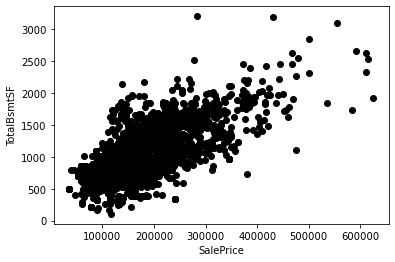

In [25]:
# # creating an object of LinearRegression class
lm = LinearRegression()
# fitting the training data
lm.fit(housing[['SalePrice']],housing['TotalBsmtSF'])
Y_P =  lm.predict(housing[['SalePrice']])

## The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(housing['TotalBsmtSF'], Y_P))

# ## Plot outputs
plt.scatter(housing[['SalePrice']], housing['TotalBsmtSF'],  color='black')
#plt.plot(train[['PricePerSF']], Y_P, color='blue', linewidth=3)

plt.xlabel('SalePrice')
plt.ylabel('TotalBsmtSF')



In [26]:
X_train, X1_test,y_train, Y_test  = train_test_split(clean_data.iloc[:, 3:], clean_data["SalePrice"], test_size=0.5, random_state=0)

In [27]:
## Load models
import pickle

with open("Pickle_xgbooster.pkl" , 'rb') as file:  
     XGBoost = pickle.load(file)

In [28]:
X_train.shape

(3397, 132)

In [29]:
XGscore = XGBoost.score(X1_test, Y_test)
print(XGscore)
predictions_test = XGBoost.predict(X1_test)
XGrmse = np.sqrt(mean_squared_error(predictions_test, Y_test))
print(XGrmse)


importances = list(XGBoost.best_estimator_.feature_importances_)
var_list = list(X1_test.columns)
var_importances = pd.DataFrame({"Predictor":var_list, "Importance":importances})

var_importances['Abs Importance'] = abs(var_importances['Importance'])
XGboost_importances =var_importances.sort_values(by = 'Abs Importance', ascending = False)
XGboost_importances


# randfor_features = var_importances.sort_values("Importance",ascending=False)
# randfor_features
ranking = list(range(1,XGboost_importances.shape[0]+1))
XGboost_importances['ranking'] = ranking
XGboost_importances

ValueError: Feature shape mismatch, expected: 133, got 132

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y = XGboost_importances.Predictor.iloc[0:5],
            x = XGboost_importances.Importance.iloc[0:5], 
           palette='Greens_r')
b.set_ylabel("XGBoost importance")
b.set_xlabel("Feature",fontsize = 20)
b.tick_params(labelsize = 12)

plt.savefig('./Figures/XGBoost_features', bbox_inches = 'tight', dpi=350)

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(y = XGboost_importances.Predictor.iloc[-6:-1], 
            x = XGboost_importances.Importance.iloc[-6:-1],
           palette='Reds')
b.set_ylabel("XGBoost importance")
b.set_xlabel("Feature",fontsize = 20)
b.tick_params(labelsize = 12)

plt.savefig('./Figures/XGBoost_features_bottom', bbox_inches = 'tight', dpi=350)

In [ ]:
zero = int(XGboost_importances[['ranking']][XGboost_importances['Abs Importance'] == 0].iloc[0])
type(zero)


XGboost_importances['ranking'][XGboost_importances['Abs Importance'] == 0] = zero
XGboost_importances

# Random forest

In [ ]:
import pickle
randfor = pickle.load(open('data/final_randomforest.sav', 'rb'))

In [ ]:
#randfor.best_score_
rand_score = randfor.score(X1_test, Y_test)
print(rand_score)
predictions_test = randfor.predict(X1_test)
rand_rmse = np.sqrt(mean_squared_error(predictions_test, Y_test))
print(rand_rmse)


importances = list(randfor.best_estimator_.feature_importances_)
var_list = list(X1_test.columns)
var_importances = pd.DataFrame({"Predictor":var_list, "Importance":importances})
var_importances

var_importances['Abs Importance'] = abs(var_importances['Importance'])
randfor_importances =var_importances.sort_values(by = 'Abs Importance', ascending = False)
randfor_importances


# randfor_features = var_importances.sort_values("Importance",ascending=False)
# randfor_features
ranking = list(range(1,randfor_importances.shape[0]+1))
randfor_importances['ranking'] = ranking
randfor_importances

# Lasso

In [ ]:

## Load models
import pickle

with open("data/Pickle_lasso.pkl" , 'rb') as file:  
     lasso = pickle.load(file)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X1)
features = scaler.transform(X1)
X1_std = pd.DataFrame(features, columns = X1.columns)

scaler = StandardScaler().fit(X1_test)
features = scaler.transform(X1_test)
X1_std_test = pd.DataFrame(features, columns = X1.columns)

In [ ]:
lasso_score = lasso.score(X1_std_test,Y_test)
print(lasso_score)
pred = lasso.predict(X1_std_test)
lasso_rmse = mean_squared_error(Y_test, pred, squared = False)
print(lasso_rmse)

In [ ]:
las_imp = pd.DataFrame()

las_imp['Feature'] = X1_std_test.columns
las_imp['Importance'] = list(lasso.coef_)
las_imp['Abs Importance'] = abs(las_imp['Importance'])
las_imp = las_imp.sort_values(by = 'Abs Importance', ascending = False)
las_imp



ranking = list(range(1,las_imp.shape[0]+1))
las_imp['ranking'] = ranking
las_imp

# Decision Tree

In [ ]:

# ## Load models
# import pickle

# with open("data/Pickle_dec_tree.pkl" , 'rb') as file:  
#      dec_tree = pickle.load(file)

In [ ]:
# #randfor.best_score_
# print(dec_tree.best_estimator_.score(X1_test,Y_test))

# print(dec_tree.score(X1_test, Y_test))
# predictions_test = randfor.predict(X1_test)
# print(np.sqrt(mean_squared_error(predictions_test, Y_test)))


# importances = list(dec_tree.best_estimator_.feature_importances_)
# var_list = list(X1_test.columns)
# var_importances = pd.DataFrame({"Predictor":var_list, "Importance":importances})

# dec_tree_features = var_importances.sort_values("Importance",ascending=False)
# dec_tree_features
# ranking = list(range(1,dec_tree_features.shape[0]+1))
# dec_tree_features['ranking'] = ranking
# dec_tree_features

In [ ]:
features = sc.transform(X1_test)
X1_std_test = pd.DataFrame(features, columns = X1.columns)

In [ ]:
svm_score = svm.score(X1_std_test, Y_test)
print(svm_score)
predictions_test = svm.predict(X1_std_test)
svm_rmse = np.sqrt(mean_squared_error(predictions_test, Y_test))
print(svm_rmse)


In [ ]:
svm_imp = pd.DataFrame()

svm_imp['Feature'] = X1_std_test.columns
svm_imp['Importance'] = svm.best_estimator_.coef_.reshape(-1,1)
svm_imp['Abs Importance'] = abs(svm_imp['Importance'])
svm_imp = svm_imp.sort_values(by = 'Abs Importance', ascending = False)
svm_imp



ranking = list(range(1,svm_imp.shape[0]+1))
svm_imp['ranking'] = ranking
svm_imp

In [ ]:
# Rank all features

# svm_imp
# las_imp
#randfor_importances
#XGboost_importances 

all_feat = XGboost_importances[['Predictor','ranking']].merge(randfor_importances[['Predictor','ranking']],
                                                              left_on = 'Predictor', right_on = 'Predictor')
all_feat.columns = ['Feature','XGboost','random_for']
all_feat = all_feat.merge(las_imp[['Feature','ranking']],left_on = 'Feature', right_on = 'Feature')
all_feat = all_feat.merge(svm_imp[['Feature','ranking']],left_on = 'Feature', right_on = 'Feature')
all_feat.columns = ['Feature','XGboost','random_for','lasso','svm']

all_feat['overall_rank'] = (all_feat['XGboost'] + all_feat['random_for'] + all_feat['lasso'] + all_feat['svm'])
all_feat['overall_rank'] = all_feat['overall_rank']/4
all_feat = all_feat.sort_values(by = 'overall_rank', ascending = True)
all_feat

In [ ]:
plt.figure(figsize=(8,12))

b = sns.scatterplot(y = all_feat['Feature'], x = all_feat['XGboost'],  color='gray')
sns.scatterplot(y = all_feat['Feature'], x = all_feat['lasso'],  color='gray')
sns.scatterplot(y = all_feat['Feature'], x = all_feat['svm'],  color='gray')
sns.scatterplot(y = all_feat['Feature'], x = all_feat['random_for'], color='gray')
b = sns.scatterplot(y = all_feat['Feature'], x = all_feat['overall_rank'],  color='red')

#plt.xlabel('Ranking', fontsize = 16) 
#plt.ylabel('Features', fontsize = 16)
b.set_ylabel("")
b.set_xlabel("Ranking",fontsize = 20)
b.tick_params(labelsize = 12)

plt.savefig('./Figures/feature_imp', bbox_inches = 'tight', dpi=350)


In [ ]:
top = all_feat.iloc[0:10]
bottom = all_feat.iloc[-11:-1]

top_bottom = top.append(bottom)
plt.figure(figsize=(8,12))

b = sns.scatterplot(y = top_bottom['Feature'], x = top_bottom['XGboost'],  color='gray')
sns.scatterplot(y = top_bottom['Feature'], x = top_bottom['lasso'],  color='gray')
sns.scatterplot(y = top_bottom['Feature'], x = top_bottom['svm'],  color='gray')
sns.scatterplot(y = top_bottom['Feature'], x = top_bottom['random_for'], color='gray')
b = sns.scatterplot(y = top_bottom['Feature'], x = top_bottom['overall_rank'],  color='red')

b.set_ylabel("")
b.set_xlabel("Ranking",fontsize = 20)
b.tick_params(labelsize = 12)

plt.savefig('./Figures/top_bottom_feature_imp', bbox_inches = 'tight', dpi=350)


## Bar graph for model scores

In [ ]:
scores = pd.DataFrame()
scores['scores'] = [lasso_score, rand_score, XGscore, svm_score]
scores['rmse'] = [lasso_rmse, rand_rmse, XGrmse, svm_rmse]
scores['model']= ['Lasso','RandomForest','XGBoost','SupportVector']
scores

In [ ]:
plt.figure(figsize=(8,8))

b = sns.barplot(y = scores['model'], x = scores['scores'])

b.set_xlabel("Scores")
b.set_ylabel("Model",fontsize = 20)
b.tick_params(labelsize = 12)
b.set_xticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8])
b.set_xlim(0.5,0.8)

plt.savefig('./Figures/model_scores', bbox_inches = 'tight', dpi=350)


In [ ]:
plt.figure(figsize=(8,8))

b = sns.barplot(y = scores['model'], x = scores['rmse'])

b.set_xlabel("RMSE [$/SF]")
b.set_ylabel("Model",fontsize = 20)
b.tick_params(labelsize = 12)
b.set_xticks([6,6.5,7, 7.5, 8, 8.5, 9 ])
b.set_xlim(6,9)

plt.savefig('./Figures/model_rmse', bbox_inches = 'tight', dpi=350)
